**Implementation of most commonly used activation functions in Deep Neural Networks
(Sigmoid, ReLU, tanh).**

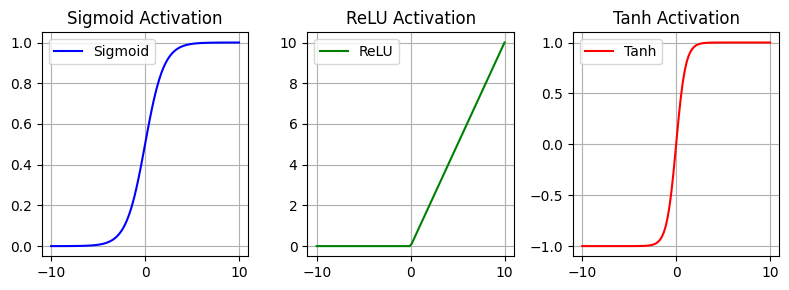

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Activation Functions
def sigmoid(x):
    """Sigmoid activation function."""
    return 1 / (1 + np.exp(-x))

def relu(x):
    """ReLU activation function."""
    return np.maximum(0, x)

def tanh(x):
    """Tanh activation function."""
    return np.tanh(x)

# Test input range
x = np.linspace(-10, 10, 100)

# Apply activation functions
sigmoid_output = sigmoid(x)
relu_output = relu(x)
tanh_output = tanh(x)

# Plot the results
plt.figure(figsize=(8, 3))

# Sigmoid
plt.subplot(1, 3, 1)
plt.plot(x, sigmoid_output, label="Sigmoid", color='blue')
plt.title("Sigmoid Activation")
plt.grid()
plt.legend()

# ReLU
plt.subplot(1, 3, 2)
plt.plot(x, relu_output, label="ReLU", color='green')
plt.title("ReLU Activation")
plt.grid()
plt.legend()

# Tanh
plt.subplot(1, 3, 3)
plt.plot(x, tanh_output, label="Tanh", color='red')
plt.title("Tanh Activation")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


**Implement a single filter convolution over a variable-sized image using a variable-sized
filter with varying stride.**

In [5]:
import numpy as np

def convolve2d(image, filter_kernel, stride=1, padding=0):
    # Add padding to the input image
    if padding > 0:
        image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant', constant_values=0)

    # Get dimensions of the image and the filter
    image_h, image_w = image.shape
    filter_h, filter_w = filter_kernel.shape

    # Calculate output dimensions
    output_h = (image_h - filter_h) // stride + 1
    output_w = (image_w - filter_w) // stride + 1

    # Initialize the output
    output = np.zeros((output_h, output_w))

    # Perform the convolution
    for i in range(0, output_h):
        for j in range(0, output_w):
            # Extract the region of the image
            region = image[i * stride:i * stride + filter_h, j * stride:j * stride + filter_w]
            # Element-wise multiplication and summation
            output[i, j] = np.sum(region * filter_kernel)

    return output

# Example usage
if __name__ == "__main__":
    # Define a sample image (5x5)
    image = np.array([
        [1, 2, 3, 4, 5],
        [6, 7, 8, 9, 10],
        [11, 12, 13, 14, 15],
        [16, 17, 18, 19, 20],
        [21, 22, 23, 24, 25]
    ])

    # Define a sample filter (3x3)
    filter_kernel = np.array([
        [1, 0, -1],
        [1, 0, -1],
        [1, 0, -1]
    ])

    # Convolve with stride=2 and padding=0
    stride = 2
    padding = 0
    output = convolve2d(image, filter_kernel, stride, padding)

    print("Input Image:\n", image)
    print("\nFilter Kernel:\n", filter_kernel)
    print("\nConvolution Output:\n", output)


Input Image:
 [[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]]

Filter Kernel:
 [[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]

Convolution Output:
 [[-6. -6.]
 [-6. -6.]]


**Implement a MULTI Filter convolution over a variable-sized image using a variable-sized
filter with varying stride and padding.**

In [6]:
import numpy as np

def multi_filter_convolve2d(image, filters, stride=1, padding=0):
    """
    Performs a 2D convolution operation on an image using multiple filters.

    Parameters:
    - image (2D array): The input image.
    - filters (3D array): A stack of filters (each filter is a 2D array).
                          Shape: (num_filters, filter_height, filter_width)
    - stride (int): The step size for the convolution.
    - padding (int): The number of pixels to pad the image with (zeros).

    Returns:
    - output (3D array): The resulting feature maps for all filters.
                         Shape: (num_filters, output_height, output_width)
    """
    # Add padding to the input image
    if padding > 0:
        image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant', constant_values=0)

    # Get dimensions of the image and the filters
    image_h, image_w = image.shape
    num_filters, filter_h, filter_w = filters.shape

    # Calculate output dimensions
    output_h = (image_h - filter_h) // stride + 1
    output_w = (image_w - filter_w) // stride + 1

    # Initialize the output
    output = np.zeros((num_filters, output_h, output_w))

    # Perform the convolution for each filter
    for f in range(num_filters):
        for i in range(0, output_h):
            for j in range(0, output_w):
                # Extract the region of the image
                region = image[i * stride:i * stride + filter_h, j * stride:j * stride + filter_w]
                # Apply the filter
                output[f, i, j] = np.sum(region * filters[f])

    return output

# Example usage
if __name__ == "__main__":
    # Define a sample image (5x5)
    image = np.array([
        [1, 2, 3, 4, 5],
        [6, 7, 8, 9, 10],
        [11, 12, 13, 14, 15],
        [16, 17, 18, 19, 20],
        [21, 22, 23, 24, 25]
    ])

    # Define multiple filters (3 filters, each 3x3)
    filters = np.array([
        [[1, 0, -1], [1, 0, -1], [1, 0, -1]],  # Filter 1
        [[1, 1, 1], [0, 0, 0], [-1, -1, -1]],  # Filter 2
        [[0, 1, 0], [1, -4, 1], [0, 1, 0]]    # Filter 3 (Laplacian)
    ])

    # Convolve with stride=2 and padding=1
    stride = 2
    padding = 1
    output = multi_filter_convolve2d(image, filters, stride, padding)

    print("Input Image:\n", image)
    print("\nFilters:\n", filters)
    print("\nConvolution Output:\n", output)


Input Image:
 [[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]]

Filters:
 [[[ 1  0 -1]
  [ 1  0 -1]
  [ 1  0 -1]]

 [[ 1  1  1]
  [ 0  0  0]
  [-1 -1 -1]]

 [[ 0  1  0]
  [ 1 -4  1]
  [ 0  1  0]]]

Convolution Output:
 [[[ -9.  -4.  13.]
  [-36.  -6.  42.]
  [-39.  -4.  43.]]

 [[-13. -24. -19.]
  [-20. -30. -20.]
  [ 33.  54.  39.]]

 [[  4.   2.  -6.]
  [-10.   0. -16.]
  [-46. -28. -56.]]]


**WAP to calculate the number of parameters at each layer of a Conv network and finally
sum them to present the total no of params for the network. The program must be generic,
i.e. the user may provide a different number of input channels, a different number of Conv
layers with individual filter sizes as well as varying dense network architectures.**

In [7]:
def calculate_conv_params(input_channels, filter_height, filter_width, num_filters):
    """
    Calculates the number of parameters in a convolutional layer.

    Parameters:
    - input_channels: Number of input channels.
    - filter_height: Height of the filter.
    - filter_width: Width of the filter.
    - num_filters: Number of filters (output channels).

    Returns:
    - params: Number of parameters in the convolutional layer.
    """
    # Each filter has weights and a bias
    params = (filter_height * filter_width * input_channels + 1) * num_filters
    return params


def calculate_dense_params(input_units, output_units):
    """
    Calculates the number of parameters in a dense (fully connected) layer.

    Parameters:
    - input_units: Number of input units.
    - output_units: Number of output units.

    Returns:
    - params: Number of parameters in the dense layer.
    """
    # Each unit has weights and a bias
    params = (input_units + 1) * output_units
    return params


def main():
    print("Generic Parameter Calculator for ConvNet\n")

    # Input layer configuration
    input_height = int(input("Enter input height: "))
    input_width = int(input("Enter input width: "))
    input_channels = int(input("Enter number of input channels: "))

    # Convolutional layers
    conv_layers = int(input("\nEnter the number of convolutional layers: "))
    total_params = 0
    prev_channels = input_channels

    for i in range(conv_layers):
        print(f"\nConvolutional Layer {i+1}:")
        filter_height = int(input("Enter filter height: "))
        filter_width = int(input("Enter filter width: "))
        num_filters = int(input("Enter number of filters: "))

        # Calculate parameters for this layer
        conv_params = calculate_conv_params(prev_channels, filter_height, filter_width, num_filters)
        total_params += conv_params

        print(f"Parameters in Convolutional Layer {i+1}: {conv_params}")

        # Update previous channels for the next layer
        prev_channels = num_filters

    # Fully connected layers
    dense_layers = int(input("\nEnter the number of dense layers: "))
    prev_units = int(input("Enter the number of units in the last Conv layer (flattened): "))

    for i in range(dense_layers):
        print(f"\nDense Layer {i+1}:")
        output_units = int(input("Enter number of output units: "))

        # Calculate parameters for this layer
        dense_params = calculate_dense_params(prev_units, output_units)
        total_params += dense_params

        print(f"Parameters in Dense Layer {i+1}: {dense_params}")

        # Update previous units for the next layer
        prev_units = output_units

    # Output the total parameters
    print("\n=======================================")
    print(f"Total Parameters in the Network: {total_params}")
    print("=======================================")


if __name__ == "__main__":
    main()


Generic Parameter Calculator for ConvNet

Enter input height: 32
Enter input width: 32
Enter number of input channels: 3

Enter the number of convolutional layers: 2

Convolutional Layer 1:
Enter filter height: 3
Enter filter width: 3
Enter number of filters: 16
Parameters in Convolutional Layer 1: 448

Convolutional Layer 2:
Enter filter height: 3
Enter filter width: 3
Enter number of filters: 32
Parameters in Convolutional Layer 2: 4640

Enter the number of dense layers: 2
Enter the number of units in the last Conv layer (flattened): 1024

Dense Layer 1:
Enter number of output units: 128
Parameters in Dense Layer 1: 131200

Dense Layer 2:
Enter number of output units: 10
Parameters in Dense Layer 2: 1290

Total Parameters in the Network: 137578


**WAP to implement the POOLING OPERATION of a CNN. Consider a Square image and a
square filter size, with variable stride(slide) value and padding. Images should be randomly
initialized between (0,255) while the filters should be initialized randomly between (
1,1).The user should only provide the image size, filter size, stride value, and padding
value.**

In [9]:
import numpy as np

def pooling_operation(image, filter_size, stride, padding, mode='max'):
    """
    Performs pooling operation on an image.

    Parameters:
    - image (2D array): Input image.
    - filter_size (int): Size of the square pooling filter.
    - stride (int): Stride value for pooling.
    - padding (int): Padding value.
    - mode (str): Type of pooling operation ('max' or 'average').

    Returns:
    - output (2D array): Pooled image.
    """
    # Add padding to the image
    if padding > 0:
        image = np.pad(image, ((padding, padding), (padding, padding)), mode='constant', constant_values=0)

    # Get dimensions of the image
    image_h, image_w = image.shape

    # Calculate output dimensions
    output_h = (image_h - filter_size) // stride + 1
    output_w = (image_w - filter_size) // stride + 1

    # Initialize the output
    output = np.zeros((output_h, output_w))

    # Perform pooling
    for i in range(output_h):
        for j in range(output_w):
            # Extract the region of the image
            region = image[i * stride:i * stride + filter_size, j * stride:j * stride + filter_size]
            if mode == 'max':
                output[i, j] = np.max(region)
            elif mode == 'average':
                output[i, j] = np.mean(region)

    return output


if __name__ == "__main__":
    # User inputs
    image_size = int(input("Enter the size of the square image: "))
    filter_size = int(input("Enter the size of the square filter: "))
    stride = int(input("Enter the stride value: "))
    padding = int(input("Enter the padding value: "))
    pooling_type = input("Enter pooling type ('max' or 'average'): ").strip().lower()

    # Generate a random image with values between 0 and 255
    image = np.random.randint(0, 256, (image_size, image_size))

    # Perform pooling
    pooled_image = pooling_operation(image, filter_size, stride, padding, mode=pooling_type)

    # Display results
    print("\nOriginal Image:\n", image)
    print(f"\nPooled Image ({pooling_type.capitalize()} Pooling):\n", pooled_image)


Enter the size of the square image: 5
Enter the size of the square filter: 2
Enter the stride value: 1
Enter the padding value: 1
Enter pooling type ('max' or 'average'): max

Original Image:
 [[194 186  17 210 174]
 [ 93 114 253 117  79]
 [120  42 164  24  42]
 [  2 117  17 126 151]
 [146  99  25 239 116]]

Pooled Image (Max Pooling):
 [[194. 194. 186. 210. 210. 174.]
 [194. 194. 253. 253. 210. 174.]
 [120. 120. 253. 253. 117.  79.]
 [120. 120. 164. 164. 151. 151.]
 [146. 146. 117. 239. 239. 151.]
 [146. 146.  99. 239. 239. 116.]]
